# Baseball Analysis

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
player_path = "./player.csv"
batting_path = "./batting.csv"
pitching_path = "./pitching.csv"
fielding_path = "./fielding.csv"

# Read the baseball data and the study results
player_data = pd.read_csv(player_path)
player_data.head()

# Clean player data
player_clean = player_data[["player_id", "birth_country", "birth_state",
                          "birth_city", "name_given", "weight", "height",
                          "bats", "throws", "debut", "final_game"]]
player_clean.head()

,player_id,birth_country,birth_state,birth_city,name_given,weight,height,bats,throws,debut,final_game
0,aardsda01,USA,CO,Denver,David Allan,220.0,75.0,R,R,4/6/2004,8/23/2015
1,aaronha01,USA,AL,Mobile,Henry Louis,180.0,72.0,R,R,4/13/1954,10/3/1976
2,aaronto01,USA,AL,Mobile,Tommie Lee,190.0,75.0,R,R,4/10/1962,9/26/1971
3,aasedo01,USA,CA,Orange,Donald William,190.0,75.0,R,R,7/26/1977,10/3/1990
4,abadan01,USA,FL,Palm Beach,Fausto Andres,184.0,73.0,L,L,9/10/2001,4/13/2006


## Bar Graph of Player Birth States 

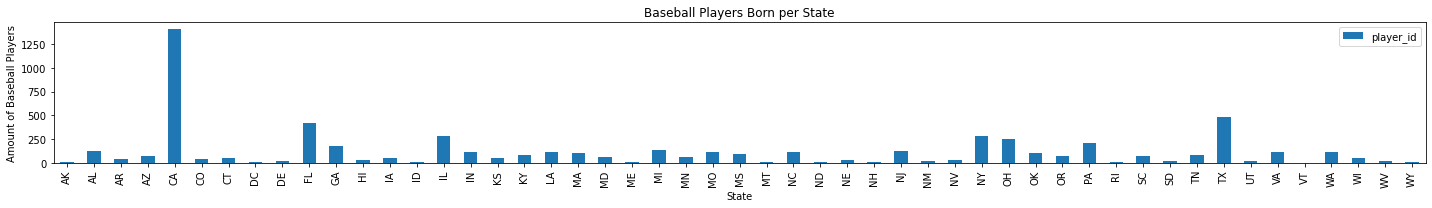

In [3]:
# Generate a bar graph of players born in each state(exclude non-US born athletes).
player_us = player_data[player_data["birth_country"] == "USA"]
player_us_year = player_us[player_us["birth_year"] >= 1950]
player_us_year

# Filter the DataFrame down only to those columns to chart
player_us_state = player_us_year[["birth_state","player_id"]]
player_us_state

# Groupby State
player_state = player_us_state.groupby("birth_state").count()
player_state

# Create a list indicating where to write x labels and set figure size to adjust for space
player_state.plot(kind="bar", figsize=(20,3))

# Set a Title and labels
plt.title("Baseball Players Born per State")
plt.xlabel("State")
plt.ylabel("Amount of Baseball Players")
plt.tight_layout()
plt.savefig("./birth_state.png")
plt.show()

## Should the NL adopt the DH rule?

In [3]:
batting_data = pd.read_csv(batting_path)
batting_data.head()

,player_id,year,stint,team_id,league_id,g,ab,r,h,double,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN


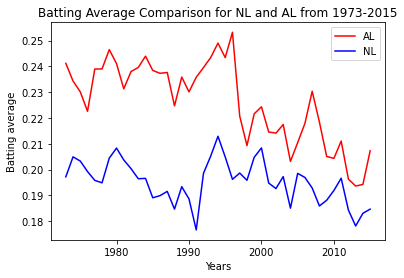

In [45]:
# DH rule was adopted by the AL league in 1973. 
batting_data = batting_data[batting_data["year"] >= 1973]
batting_data

# Find the batting average and add a new column
batting_data["ba"] = ""
ba = batting_data["h"]/batting_data["ab"]
batting_data["ba"] = ba
batting_data

# Remove NAN
batting_data.dropna()

# Get the mean batting average per year for the AL
batting_al = batting_data[batting_data["league_id"] == "AL"]
batting_al
# Group by year
batting_al = batting_al.groupby("year").mean()["ba"]
batting_al

# Get the mean batting average per year for the NL
batting_nl = batting_data[batting_data["league_id"] == "NL"]
batting_nl
# Group by year
batting_nl = batting_nl.groupby("year").mean()["ba"]
batting_nl

# Plot as a line graph
x_axis = np.arange(1973,2016,1)
# print(x_axis)
al_ba, = plt.plot(x_axis, batting_al, color="red", label="AL")
nl_ba, = plt.plot(x_axis, batting_nl, color="blue", label="NL")
plt.title("Batting Average Comparison for NL and AL from 1973-2015")
plt.xlabel("Years")
plt.ylabel("Batting average")
plt.legend(handles=[al_ba, nl_ba], loc="best")
plt.show()

### Observation: Overall batting average for the National League is lower then the American League. The American League uses desginated hitters in place of their pitchers batting. This could show the impact of having a hitting focused player in the line-up who replaces the pitcher, who tends to be the weaker batter.

## Pitching

## Has ERA improved over the years? Are there more strikouts?

In [2]:
pitching_data = pd.read_csv(pitching_path)
pitching_data.head()

,player_id,year,stint,team_id,league_id,w,l,g,gs,cg,...,ibb,wp,hbp,bk,bfp,gf,r,sh,sf,g_idp
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,NaN,NaN,0,NaN,NaN,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,NaN,NaN,0,NaN,NaN,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,NaN,NaN,0,NaN,NaN,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,NaN,NaN,NaN,0,NaN,NaN,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,NaN,NaN,0,NaN,NaN,21,NaN,NaN,NaN


Text(0, 0.5, 'Earned Run Average')

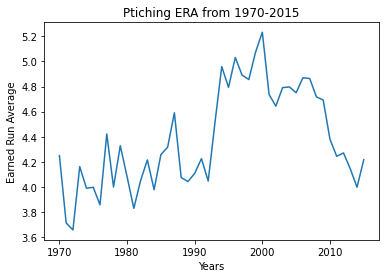

In [3]:
# Show only more recent pitching starting at 1970 and games played more than 5
pitching_clean = pitching_data[pitching_data["year"] >= 1970]
pitching_games = pitching_clean[pitching_clean["g"] > 5]
pitching_games

# Group pitching records by year and average era
pitching_era = pitching_games.groupby("year").mean()["era"]
pitching_era

# Plot as line
xaxis = np.arange(1970, 2016, 1)
plt.plot(xaxis, pitching_era)
plt.title("Ptiching ERA from 1970-2015")
plt.xlabel("Years")
plt.ylabel("Earned Run Average")

### Observation: Pitching ERA spike in the late 90's. Baseball began to focus on strangth training in the 80s and this could show an benefit of trianing as pitchers gave up more hits. The 90's became known as the "Steriod Era" where players used performance enhancing drugs to improve their power. 

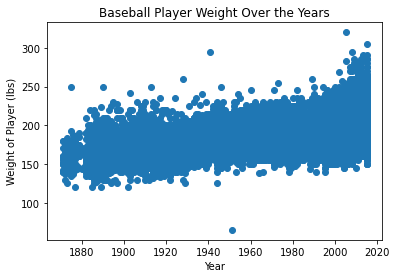

In [13]:
# Change in player size over the years
import warnings
warnings.filterwarnings('ignore')

player_data
player_data["final"] = pd.to_datetime(player_data['final_game'], format='%Y-%m-%d').dt.year
player_data.dropna()

# Create scatter plot
x_values = player_data["final"]
y_values = player_data["weight"]

plt.scatter(x_values,y_values)
plt.xlabel("Year")
plt.ylabel("Weight of Player (lbs)")
plt.title("Baseball Player Weight Over the Years")
plt.show()


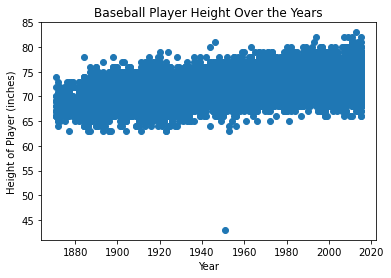

In [14]:
# Create scatter plot
x_values = player_data["final"]
y_values2 = player_data["height"]

plt.scatter(x_values,y_values2)
plt.xlabel("Year")
plt.ylabel("Height of Player (inches)")
plt.title("Baseball Player Height Over the Years")
plt.show()



### Observation: There appears to be a trend for increased height and weight in baseball players over the years, but this can be a result of general population size increase.


## Total Errors by Position

Text(0, 0.5, 'Total Errors')

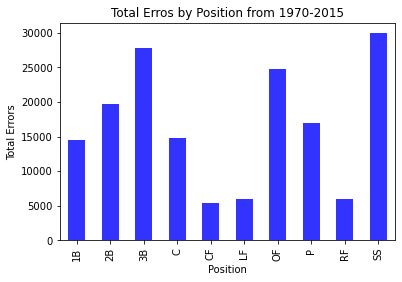

In [5]:
# Import the fielding data
fielding_data = pd.read_csv(fielding_path)
fielding_data

# Only show data from 1970 and remove position DH(hitter only)
fielding_data = fielding_data [fielding_data["year"] >= 1970]
fielding_data = fielding_data[fielding_data["pos"] != "DH"]
fielding_data

# Combine by position and find the most errors
err_data = fielding_data[fielding_data["g"] != 0]
err_data = err_data.groupby("pos").sum()["e"]
err_data.sort_values()

# Plot the data as a bar chart
err_data.plot(kind = "bar", color = "blue", alpha = 0.8, align ="center")

# Add labels
plt.title("Total Erros by Position from 1970-2015")
plt.xlabel("Position")
plt.ylabel("Total Errors")


### Observation: Shortstops and 3rd Base have the most errors and individual outfield positions(RF, LF, CF) have the least. This is expected as SS and 3rd base have more attempts at fielding than other positions.

## Do players with more years played have better fielding percentage?

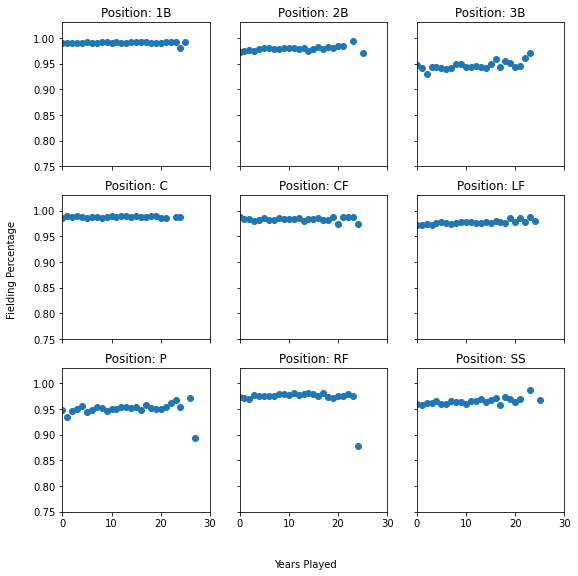

In [18]:
import warnings
warnings.filterwarnings('ignore')

# Find the total years played
player_clean["started"] = pd.to_datetime(player_clean['debut'], format='%Y-%m-%d').dt.year
player_clean["final"] = pd.to_datetime(player_clean['final_game'], format='%Y-%m-%d').dt.year
years_played = player_clean["final"] - player_clean["started"]
player_clean["years_played"] = years_played
player_clean

# Merge the data
new_field = pd.merge(fielding_data, player_clean, on="player_id")
new_field

# Find the fielding percentage(FP = (put out + attempts)/(put outs + attempts + errors))
# Create a new column for fielding percentage
new_field["FP"] = ""
new_field
new_field["FP"] = (new_field["po"] + new_field["a"])/(new_field["po"] + new_field["a"] + new_field["e"])

# Remove players that had less than 5 games played
new_field = new_field[new_field["g"]> 5]
new_field = new_field.groupby(["pos", "years_played"]).mean()[["FP"]]
new_field = new_field.reset_index(level=['pos', 'years_played'])
positions = ['1B', '2B', '3B', 'C', 'CF', 'LF', 'P', 'RF', 'SS']
new_field

# Create a scatter plot
fig, axes = plt.subplots(nrows=3, ncols=3, sharex = True, sharey = True, figsize=(9, 9))
fig.text(0.5, 0.04, 'Years Played', ha='center')
fig.text(0.04, 0.5, 'Fielding Percentage', va='center', rotation='vertical')
axes = axes.ravel()
for i in range(9):
    data = new_field[new_field["pos"] == positions[i]]
    axes[i].scatter(data["years_played"], data["FP"])
    axes[i].set_xlim(0,30)
    axes[i].set_ylim(0.75, 1.03)
    axes[i].set_title("Position: " + positions[i])

### Observation: At this level of competition, the average fielding percentage does not vary much for amount of time spent playing professional baseball. Fielding percentages remain fairly consistent across all positions.